In [ ]:
import pandas as pd
import numpy as np
import time as timer

In [ ]:
df = pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

FileNotFoundError: ignored

#Data Processing

In [ ]:
import datetime
df['Total Years'] = datetime.datetime.now().year-df['YearBuilt']

In [ ]:
df.drop("YearBuilt",axis=1,inplace=True)

In [ ]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [ ]:
### Stacking and Converting Into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features
                       

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [ ]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [ ]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)


In [ ]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [ ]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [ ]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

####Embedding Size For Categorical columns

In [ ]:

cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [ ]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [ ]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
embedding_val

[tensor([[-0.2414, -0.0088, -1.2281,  ..., -0.2667, -0.9746,  0.8577],
         [ 0.5881,  0.2944, -1.3633,  ...,  0.4819, -1.6871, -1.4530],
         [-0.2414, -0.0088, -1.2281,  ..., -0.2667, -0.9746,  0.8577],
         ...,
         [-0.8249, -1.6266, -0.7188,  ...,  0.7659,  0.5981,  0.5211],
         [ 0.5881,  0.2944, -1.3633,  ...,  0.4819, -1.6871, -1.4530],
         [ 0.5881,  0.2944, -1.3633,  ...,  0.4819, -1.6871, -1.4530]],
        grad_fn=<EmbeddingBackward>), tensor([[-0.4190,  0.8713,  0.7581],
         [-0.4190,  0.8713,  0.7581],
         [-0.4190,  0.8713,  0.7581],
         ...,
         [-0.4190,  0.8713,  0.7581],
         [-0.4190,  0.8713,  0.7581],
         [-0.4190,  0.8713,  0.7581]], grad_fn=<EmbeddingBackward>), tensor([[0.0925],
         [0.0925],
         [0.0925],
         ...,
         [0.0925],
         [0.0925],
         [0.0925]], grad_fn=<EmbeddingBackward>), tensor([[ 0.6310, -0.1035],
         [ 0.6310, -0.1035],
         [ 0.4207, -1.0166],
     

In [ ]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.2414, -0.0088, -1.2281,  ...,  0.0925,  0.6310, -0.1035],
        [ 0.5881,  0.2944, -1.3633,  ...,  0.0925,  0.6310, -0.1035],
        [-0.2414, -0.0088, -1.2281,  ...,  0.0925,  0.4207, -1.0166],
        ...,
        [-0.8249, -1.6266, -0.7188,  ...,  0.0925,  0.6310, -0.1035],
        [ 0.5881,  0.2944, -1.3633,  ...,  0.0925,  0.6310, -0.1035],
        [ 0.5881,  0.2944, -1.3633,  ...,  0.0925,  0.6310, -0.1035]],
       grad_fn=<CatBackward>)

In [ ]:
#### Implement dropupout
droput=nn.Dropout(.4)
final_embed=droput(z)
final_embed

tensor([[-0.0000, -0.0000, -2.0469,  ...,  0.0000,  1.0517, -0.0000],
        [ 0.9801,  0.0000, -2.2722,  ...,  0.0000,  0.0000, -0.0000],
        [-0.0000, -0.0147, -2.0469,  ...,  0.0000,  0.7012, -0.0000],
        ...,
        [-1.3748, -0.0000, -1.1980,  ...,  0.1542,  0.0000, -0.1726],
        [ 0.0000,  0.0000, -0.0000,  ...,  0.1542,  0.0000, -0.0000],
        [ 0.0000,  0.0000, -0.0000,  ...,  0.1542,  0.0000, -0.1726]],
       grad_fn=<MulBackward0>)

#Optimisers

##SGD

###Network

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.4):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
loss_function=nn.MSELoss()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs=5000

In [ ]:
def g_plot(final_losses):
  plt.figure(figsize = (12.8,9.6))
  plt.plot(range(epochs), final_losses)
  plt.grid(True)
  plt.ylabel('Loss')
  plt.xlabel('epoch');

In [ ]:
batch_size=1200
train_categorical=cat_features[:]
train_cont=cont_values[:]
y_train=y[:]

In [ ]:
final_losses_SGD=[]
def fit(epochs=5000):
  for i in range(epochs):
      i += 1
      y_pred=model(train_categorical,train_cont)
      loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
      final_losses_SGD.append(loss)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  g_plot(final_losses_SGD)

### Define Loss And Optimizer

In [ ]:
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01 )

Time taken:  61.141371965408325




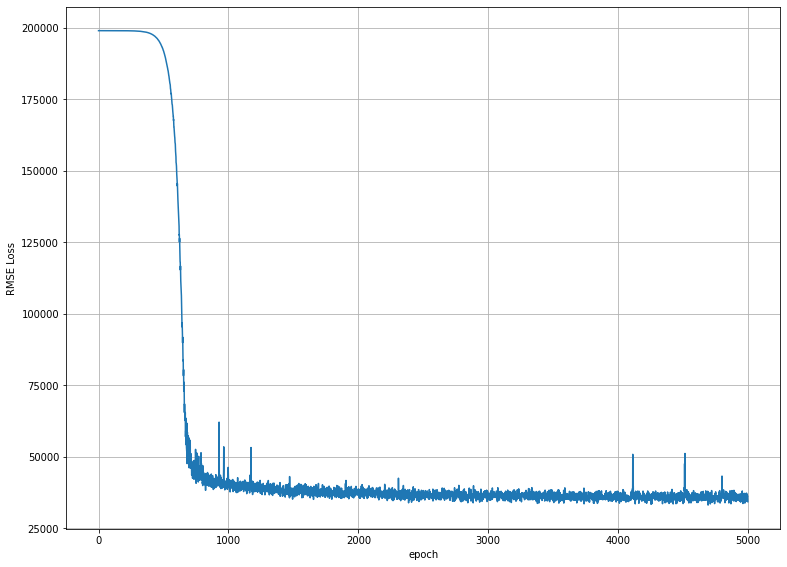

In [ ]:
start = timer.time()
fit()
print('Time taken: ' ,timer.time() - start) 
print('Minmum Loss: \n' , min_SGD = final_losses_SGD[-1])

##SGD with Momentum

###Network

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.4):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
loss_function=nn.MSELoss()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs=5000

In [ ]:
def g_plot(final_losses):
  plt.figure(figsize = (12.8,9.6))
  plt.plot(range(epochs), final_losses)
  plt.grid(True)
  plt.ylabel('Loss')
  plt.xlabel('epoch');

In [ ]:
batch_size=1200
train_categorical=cat_features[:]
train_cont=cont_values[:]
y_train=y[:]

In [ ]:
final_losses_SGD_m=[]
def fit(epochs=5000):
  for i in range(epochs):
      i += 1
      y_pred=model(train_categorical,train_cont)
      loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
      final_losses_SGD_m.append(loss)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  g_plot(final_losses_SGD_m)

### Define Loss And Optimizer

In [ ]:
optimizer =  torch.optim.SGD(model.parameters() , lr = 0.01 , momentum = 0.95)

Time taken:  61.387383222579956




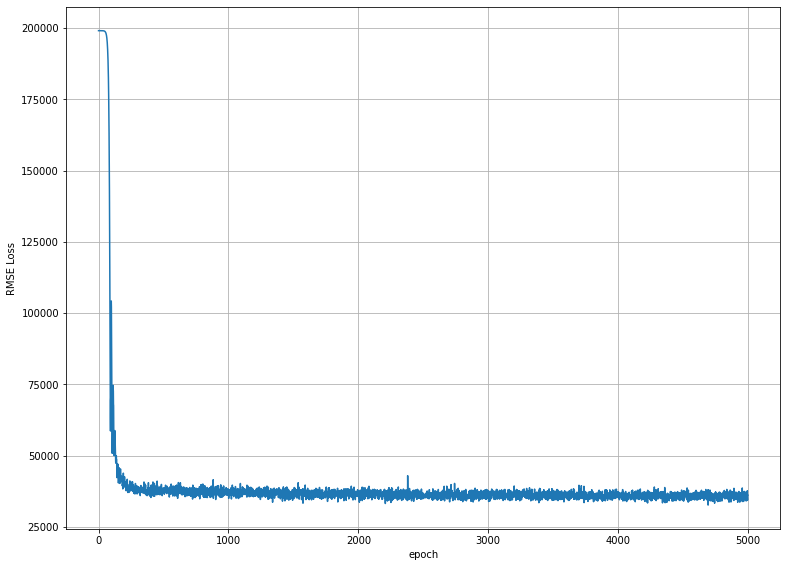

In [ ]:
start = timer.time()
fit()
print('Time taken: ' ,timer.time() - start) 
print('Minmum Loss: \n' , min_SGD_m = final_losses_SGD_m[-1])

##Adagrad

###Network

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.4):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
loss_function=nn.MSELoss()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs=5000

In [ ]:
def g_plot(final_losses):
  plt.figure(figsize = (12.8,9.6))
  plt.plot(range(epochs), final_losses)
  plt.grid(True)
  plt.ylabel('RMSE Loss')
  plt.xlabel('epoch');

In [ ]:
batch_size=1200
train_categorical=cat_features[:]
train_cont=cont_values[:]
y_train=y[:]

In [ ]:
final_losses_Adagrad=[]
def fit(epochs=5000):
  
  for i in range(epochs):
      i += 1
      y_pred=model(train_categorical,train_cont)
      loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
      final_losses_Adagrad.append(loss)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  g_plot(final_losses_Adagrad)

### Define Loss And Optimizer

In [ ]:
optimizer = torch.optim.Adagrad(model.parameters() , lr = 0.01)

Time taken:  61.18238854408264




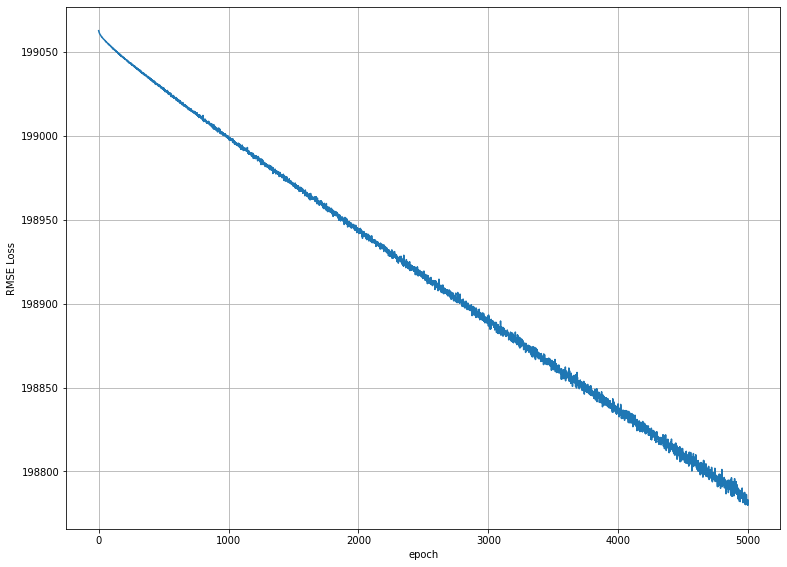

In [ ]:
start = timer.time()
fit()
print('Time taken: ' ,timer.time() - start) 
print('Minmum Loss: \n' , min_SGD_Adagrad = final_losses_Adagrad[-1])

##RMS Prop

###Network

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.4):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
loss_function=nn.MSELoss()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs=5000

In [ ]:
def g_plot(final_losses):
  plt.figure(figsize = (12.8,9.6))
  plt.plot(range(epochs), final_losses)
  plt.grid(True)
  plt.ylabel('RMSE Loss')
  plt.xlabel('epoch');

In [ ]:
batch_size=1200
train_categorical=cat_features[:]
train_cont=cont_values[:]
y_train=y[:]

In [ ]:
final_losses_RMSprop=[]
def fit(epochs=5000): 
  for i in range(epochs):
      i += 1
      y_pred=model(train_categorical,train_cont)
      loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
      final_losses_RMSprop.append(loss)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  g_plot(final_losses_RMSprop)

### Define Loss And Optimizer

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters() , lr = 0.01  , alpha = 0.95)

Time taken:  61.41201400756836




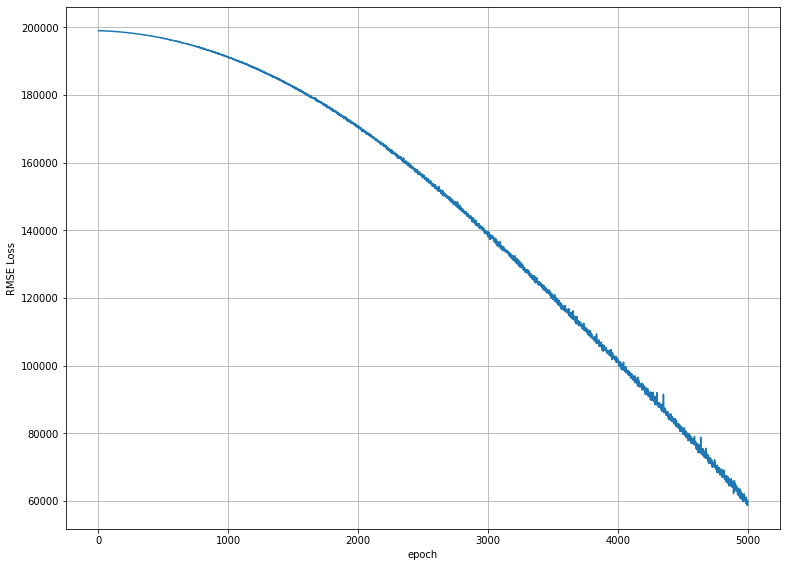

In [ ]:
start = timer.time()
fit()
print('Time taken: ' ,timer.time() - start) 
print('Minmum Loss: \n' , min_RMSprop = final_losses_RMSprop[-1])

##Adam

###Network

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.4):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
loss_function=nn.MSELoss()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs=5000

In [ ]:
def g_plot(final_losses):
  plt.figure(figsize = (12.8,9.6))
  plt.plot(range(epochs), final_losses)
  plt.grid(True)
  plt.ylabel('RMSE Loss')
  plt.xlabel('epoch');

In [ ]:
batch_size=1200
train_categorical=cat_features[:]
train_cont=cont_values[:]
y_train=y[:]

In [ ]:
final_losses_Adam=[]
def fit(epochs=5000):
  for i in range(epochs):
      i += 1
      y_pred=model(train_categorical,train_cont)
      loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
      final_losses_Adam.append(loss)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  g_plot(final_losses_Adam)

### Define Loss And Optimizer

In [ ]:
optimizer = torch.optim.Adam(model.parameters()  , lr = 0.01)

Time taken:  63.562233448028564




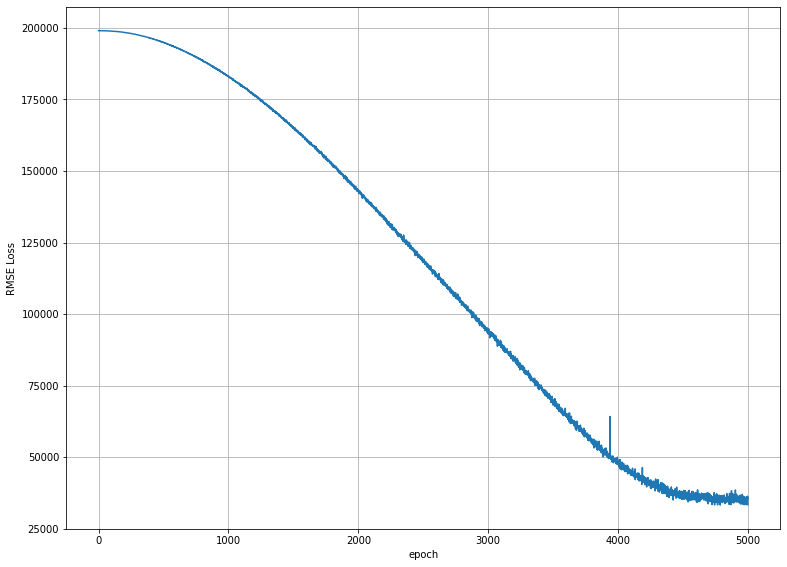

In [ ]:
start = timer.time()
fit()
print('Time taken: ' ,timer.time() - start) 
print('Minmum Loss: \n' , min_Adam = final_losses_Adam[-1])

##Conclusion

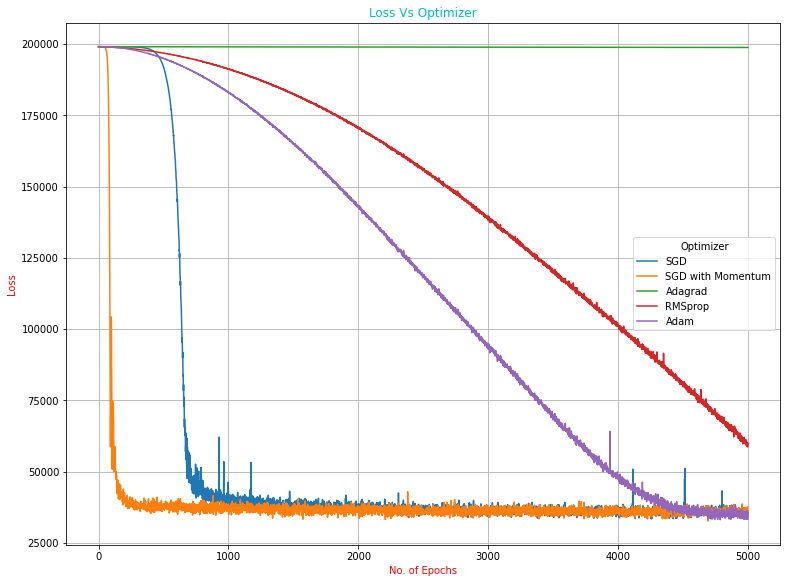

In [ ]:
plt.figure(figsize = (12.8,9.6))

plt.plot(range(epochs) , final_losses_SGD , label = 'SGD')
plt.plot(range(epochs) , final_losses_SGD_m , label = 'SGD with Momentum')
plt.plot(range(epochs) , final_losses_Adagrad , label = 'Adagrad')
plt.plot(range(epochs) , final_losses_RMSprop , label = 'RMSprop')
plt.plot(range(epochs) , final_losses_Adam , label = 'Adam')

plt.title('Loss Vs Optimizer' , color = 'c')
plt.xlabel('No. of Epochs' , color = 'r')
plt.ylabel('Loss', color = 'r')
plt.legend(title = 'Optimizer')
plt.grid(True)
